# Examen - Parte 2

In [1]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : Escalación, normalización y discretización
# Author      : Dilan Castañeda                                             
# Created On  : September 2, 2024                                           
# Last Update : September 2, 2024                                         
# Version     : 1.0.0                                          
# Description : A system for managing electronics store inventory with classes for devices, computers, hard drives, and data validation using regex.                
# ─────────────────────────────────────────────────────────────────────────────

## Descripción

Este conjunto de datos, es una colección de gigantes de YouTube, ofrece una vía perfecta para analizar y obtener información valiosa de las luminarias de la plataforma. Con detalles completos sobre el número de suscriptores de los principales creadores, visualizaciones de videos, frecuencia de carga, país de origen, ganancias y más.

1. En un archivo Jupyter Notebook, lee los datos y asignalos a un dataframe que llevara tus iniciales (por ejemplo: con mi nombre Jose Eduardo Ferrer Cruz mi dataframe seria JEFC)

2. Revisa que el dataframe no contenga valos NaN, de ser asi elimina tales registros.

3. La columna 'Youtuber' no debe contener caracteres especiales.

4. Discretiza los valores "video views" en 15 bins. Cada bin debe llamarse como el rango que representa.

5. Normaliza los datos de "subscribers" para transformarlos en valores dentro del rango 0 a 1

6. Obten la informacion de los siguientes queries:

Segundo pais mas representado en la tabla
Valor promedio de suscriptores
Cuantos youtubers de la India pertenecen la categoria "comedy"
Valor medio de "uploads"
7. Imprime el dataframe transformado.

8. Exporta con pandas el dataframe en un archivo CSV con el siguiente nombre "EXAMEN_m2_XXXXXXXXX"   <- siendo XXXXXXX tu matricula TEC.

In [103]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 1. Load DB
En un archivo Jupyter Notebook, lee los datos y asignalos a un dataframe que llevara tus iniciales (por ejemplo: con mi nombre Jose Eduardo Ferrer Cruz mi dataframe seria JEFC)


In [19]:
# Load the dataset
DGC = pd.read_csv('GlobalYouTubeStatistics.csv')

# Display ranodm rows
DGC.sample(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
332,333,ZAMZAM ELECTRONICS TRADING,21700000,8.507819e+09,NaN,ZAMZAM ELECTRONICS TRADING,15126,United Arab Emirates,AE,People,...,3400000.0,2020.0,Dec,19.0,36.8,9770529.0,2.35,8479744.0,23.424076,53.847818
406,407,HaerteTest,19800000,3.234880e+09,Science & Technology,HaerteTest,1411,Germany,DE,Tech,...,NaN,2011.0,Sep,6.0,70.2,83132799.0,3.04,64324835.0,51.165691,10.451526
446,447,Farruko,18800000,9.573641e+09,Music,Farruko,217,United States,US,Music,...,100000.0,2009.0,Oct,30.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
939,940,#Refï¿½ï¿½ï¿½ï¿½,12700000,2.709954e+09,Entertainment,#Refugio Mental,846,NaN,NaN,Entertainment,...,NaN,2013.0,Aug,10.0,NaN,NaN,NaN,NaN,NaN,NaN
804,805,Darkar Company Studios,13900000,2.244318e+09,Film & Animation,Darkar Company Studios,183,United States,US,Comedy,...,NaN,2009.0,Feb,15.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


## 2. Handling NAN
Revisa que el dataframe no contenga valos NaN, de ser asi elimina tales registros.

In [60]:
# Verify the data types and the missing values
DGC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [61]:
# Drop the missing values
DGC_no_nan = DGC.dropna()

# Verify the data after dropping the missing values
DGC_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   Abbreviation                             554 non-null    object 
 9   channel_type                             554 non-null    object 
 10  video_views_rank                         554 non-null  

## 3. Standarize YouTuber column
La columna 'Youtuber' no debe contener caracteres especiales.

In [62]:
# Print unique values before cleaning
print(DGC_no_nan['Youtuber'].unique())

# Remove special characters
DGC_no_nan['Youtuber clean'] = DGC_no_nan['Youtuber'].apply(lambda x: re.sub(r'[^a-zA-Z0-9_ ]', '', x).strip())
DGC_no_nan['Youtuber'] = DGC_no_nan['Youtuber clean'].apply(lambda x: re.sub(r' +', ' ', x))

# Drop the column 'Youtuber clean'
DGC_no_nan.drop('Youtuber clean', axis=1, inplace=True)

DGC_no_nan


['T-Series' 'MrBeast' 'Cocomelon - Nursery Rhymes' 'SET India'
 'Like Nastya' 'Vlad and Niki' 'Zee Music Company' 'WWE' 'BLACKPINK'
 'Sony SAB' 'BANGTANTV' 'Justin Bieber' 'HYBE LABELS' 'Zee TV'
 "Pinkfong Baby Shark - Kids' Songs & Stories"
 'ChuChu TV Nursery Rhymes & Kids Songs' 'Shemaroo Filmi Gaane'
 'Colors TV' 'Dude Perfect' 'Movieclips' 'Tips Official'
 'El Reino Infantil' 'Wave Music' 'Aaj Tak' 'Sony Music India'
 'EminemMusic' 'Marshmello' 'YRF' 'Ed Sheeran' 'Infobells - Hindi'
 'Taylor Swift' 'Ariana Grande'
 'BillionSurpriseToys  - Nursery Rhymes & Cartoons' 'JuegaGerman'
 'Billie Eilish' 'Get Movies' 'Shemaroo' 'SonyMusicIndiaVEVO' 'A4'
 'Fernanfloo' 'Voot Kids' 'Felipe Neto' 'Vocï¿½ï¿½ï¿½' 'HAR PAL GEO'
 'Katy Perry' 'ABS-CBN Entertainment' 'Shakira'
 'ýýýýýýýý ýý ýýýýýýýýýýýýýý' 'ARY Digital HD' 'Speed Records'
 'Masha and The Bear' 'Rihanna' 'Ishtar Music' 'Kimberly Loaiza'
 'Little Baby Bum - Nursery Rhymes & Kids Songs' 'shfa2 - ï¿½ï¿½'
 'CarryMinati' 'XXXTENTACION' '

C:\Users\dilan\AppData\Local\Temp\ipykernel_6412\3480803824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DGC_no_nan['Youtuber clean'] = DGC_no_nan['Youtuber'].apply(lambda x: re.sub(r'[^a-zA-Z0-9_ ]', '', x).strip())
C:\Users\dilan\AppData\Local\Temp\ipykernel_6412\3480803824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DGC_no_nan['Youtuber'] = DGC_no_nan['Youtuber clean'].apply(lambda x: re.sub(r' +', ' ', x))
C:\Users\dilan\AppData\Local\Temp\ipykernel_6412\3480803824.py:9: SettingWithCopyWa

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,TSeries,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por A,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## 4. Discretization of video views
Discretiza los valores "video views" en 15 bins. Cada bin debe llamarse como el rango que representa.

Rango max: 228000000000
Rango min: 0
Rango: 228000000000
Ancho de los grupos: 15200000000
[0, 15200000000, 30400000000, 45600000000, 60800000000, 76000000000, 91200000000, 106400000000, 121600000000, 136800000000, 152000000000, 167200000000, 182400000000, 197600000000, 212800000000, 228000000000]
['0 - 15200000000', '15200000000 - 30400000000', '30400000000 - 45600000000', '45600000000 - 60800000000', '60800000000 - 76000000000', '76000000000 - 91200000000', '91200000000 - 106400000000', '106400000000 - 121600000000', '121600000000 - 136800000000', '136800000000 - 152000000000', '152000000000 - 167200000000', '167200000000 - 182400000000', '182400000000 - 197600000000', '197600000000 - 212800000000', '212800000000 - 228000000000']


C:\Users\dilan\AppData\Local\Temp\ipykernel_6412\2791427917.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DGC_no_nan['video views categ'] = pd.cut(DGC_no_nan['video views'], bins=intervalos, labels=columns, include_lowest=True)


(array([           0,  15200000000,  30400000000,  45600000000,
         60800000000,  76000000000,  91200000000, 106400000000,
        121600000000, 136800000000, 152000000000, 167200000000,
        182400000000, 197600000000, 212800000000, 228000000000]),
 [Text(0, 0, '0.000'),
  Text(15200000000, 0, '0.152'),
  Text(30400000000, 0, '0.304'),
  Text(45600000000, 0, '0.456'),
  Text(60800000000, 0, '0.608'),
  Text(76000000000, 0, '0.760'),
  Text(91200000000, 0, '0.912'),
  Text(106400000000, 0, '1.064'),
  Text(121600000000, 0, '1.216'),
  Text(136800000000, 0, '1.368'),
  Text(152000000000, 0, '1.520'),
  Text(167200000000, 0, '1.672'),
  Text(182400000000, 0, '1.824'),
  Text(197600000000, 0, '1.976'),
  Text(212800000000, 0, '2.128'),
  Text(228000000000, 0, '2.280')])

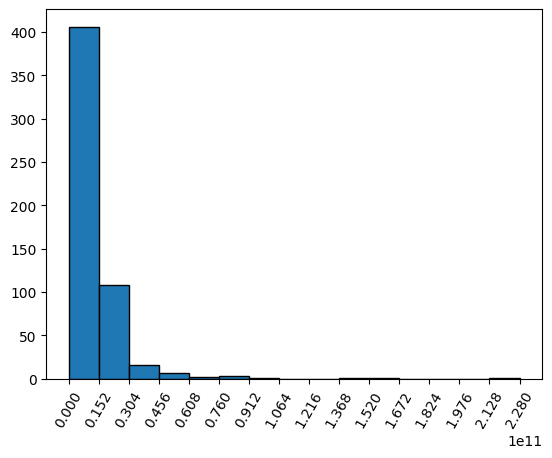

In [102]:
# Calculate range and bin width
maxrange = int(np.ceil(max(DGC['video views'])))
minrange = int(np.floor(min(DGC['video views'])))
ageRange = maxrange - minrange
bins = 15
binwidth = int(np.round(ageRange/bins))

# Print the results
print("Rango max:",maxrange)
print("Rango min:",minrange)
print("Rango:",ageRange)
print("Ancho de los grupos:",binwidth)

# Create the intervals
intervalos = [ age for age in range(minrange, maxrange+binwidth, binwidth)]
print(intervalos)

# Create the labels
columns = []
for _ in range (len(intervalos)-1):
    columns.append(str(intervalos[_]) + " - " + str(intervalos[_+1]))
print(columns)

# Create the new column
DGC_no_nan['video views categ'] = pd.cut(DGC_no_nan['video views'], bins=intervalos, labels=columns, include_lowest=True)


# Plot the histogram
plt.hist(DGC_no_nan['video views'], bins=intervalos, edgecolor='black')
plt.xticks(intervalos)
plt.xticks(rotation=60)


## 5. Normalize subscribers
Normaliza los datos de "subscribers" para transformarlos en valores dentro del rango 0 a 1

In [104]:
# Normalize subscribers
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(DGC_no_nan[['subscribers']])
DGC_no_nan['subscribers norm'] = scaler.transform(DGC_no_nan[['subscribers']])
DGC_no_nan[['subscribers','subscribers norm']]

C:\Users\dilan\AppData\Local\Temp\ipykernel_6412\100250822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DGC_no_nan['subscribers norm'] = scaler.transform(DGC_no_nan[['subscribers']])


,subscribers,subscribers norm
0,245000000,1.000000
2,166000000,0.660507
3,162000000,0.643318
4,159000000,0.630425
8,106000000,0.402664
...,...,...
989,12400000,0.000430
990,12300000,0.000000
991,12300000,0.000000
993,12300000,0.000000


## 6. Queries

Obten la informacion de los siguientes queries:
* Segundo pais mas representado en la tabla
* Valor promedio de suscriptores
* Cuantos youtubers de la India pertenecen la categoria "comedy"
* Valor medio de "uploads"

In [114]:
# Second country with the most subscribers
print("Country with the second most subscribers:")
print(DGC_no_nan[DGC_no_nan['subscribers'] == DGC_no_nan['subscribers'].nlargest(2).iloc[1]]['Country'].values[0])
print("")

# Subscribers average
print("Average subscribers:")
print(round(DGC_no_nan['subscribers'].mean(),2))
print("")

# Amount of subscribers in India in category comedy
print("Amount of subscribers in India in category comedy:")
print(round(DGC_no_nan[(DGC_no_nan['Country'] == 'India') & (DGC_no_nan['category'] == 'Comedy')]['Youtuber'].count(),2))
print("")


# Mean value of uploaded videos
print("Mean value of uploaded videos:")
print(DGC_no_nan['uploads'].mean())


Country with the second most subscribers:
United States

Average subscribers:
24756959.71

Amount of subscribers in India in category comedy:
14

Mean value of uploaded videos:
14962.423076923076


## Dataframe Transformed

In [112]:
# Save csv
DGC_no_nan.to_csv('EXAMEN_m2_A00831905.csv', index=False)

# Print the results
DGC_no_nan

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,video views categ,subscribers norm
0,1,TSeries,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,212800000000 - 228000000000,1.000000
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,15200000000 - 30400000000,0.660507
3,4,Cocomelon Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,152000000000 - 167200000000,0.643318
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,136800000000 - 152000000000,0.630425
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,76000000000 - 91200000000,0.402664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,0 - 15200000000,0.000430
990,991,Natan por A,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,0 - 15200000000,0.000000
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,0 - 15200000000,0.000000
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,0 - 15200000000,0.000000
